Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Instructions:
Download the wine dataset from the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Wine).
Load the dataset into a Pandas dataframe.
Split the dataset into features and target variables.
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
Implement PCA on the preprocessed dataset using the scikit-learn library.
Determine the optimal number of principal components to retain based on the explained variance ratio.
Visualise the results of PCA using a scatter plot.
Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
Interpret the results of PCA and clustering analysis.

Deliverables:
Jupyter notebook containing the code for the PCA implementation.
A report summarising the results of PCA and clustering analysis.
Scatter plot showing the results of PCA.
A table showing the performance metrics for the clustering algorithm.

Additional Information:
You can use the python programming language.
You can use any other machine learning libraries or tools as necessary.
You can use any visualisation libraries or tools as necessary.

In [2]:
!pip install ucimlrepo

In [19]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  


## Decriptive Stats and EDA

In [5]:
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [7]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
X.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

- No Missing data in the given Dataset

In [10]:
scaler=StandardScaler()

In [11]:
X_scaled=scaler.fit_transform(X)

In [25]:
X_scaled.shape

(178, 13)

In [12]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [24]:
X_pca.shape

(178, 13)

In [13]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [14]:
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

In [15]:
print(f"Number of components explaining at least 95% variance: {n_components}")

Number of components explaining at least 95% variance: 10


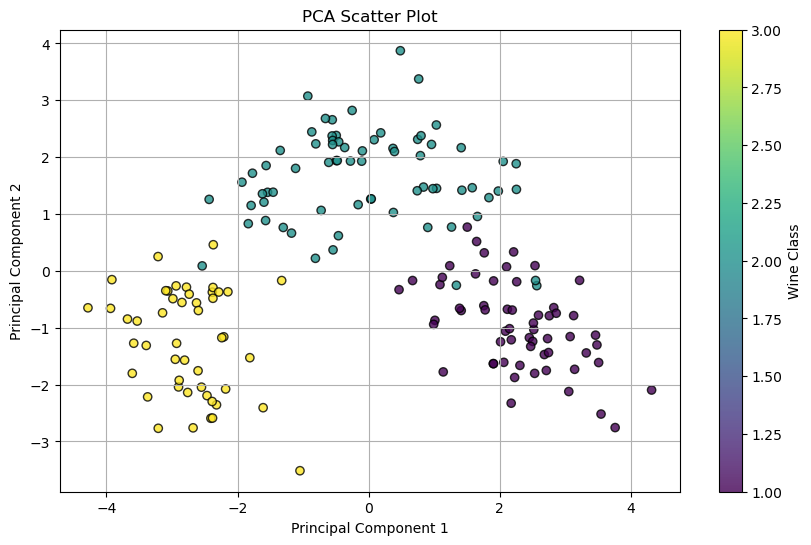

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.values.flatten(), cmap='viridis', edgecolor='k', alpha=0.8)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Wine Class')
plt.grid(True)
plt.show()

## KMeans Clustering

In [20]:
X_pca_cluster = X_pca[:, :n_components] 

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming there are 3 clusters based on the wine dataset
clusters = kmeans.fit_predict(X_pca_cluster)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


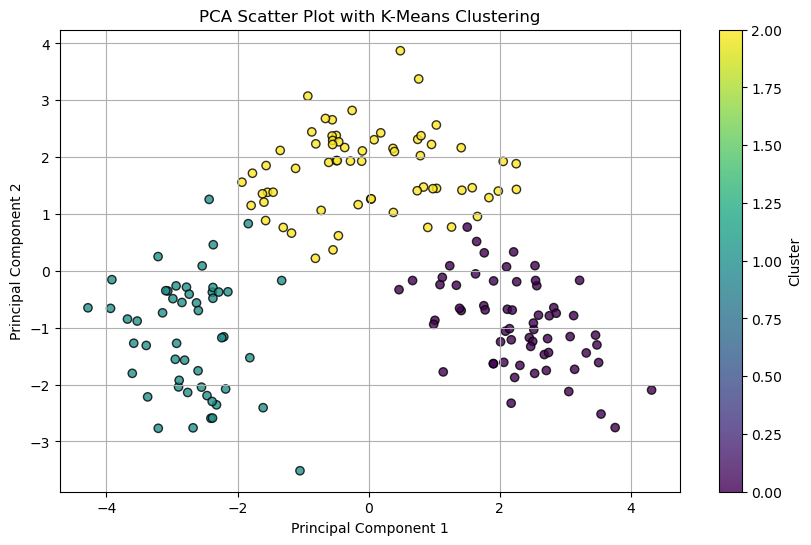

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', alpha=0.8)
plt.title('PCA Scatter Plot with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

**Summary Report: PCA and Clustering Analysis**

**1. PCA (Principal Component Analysis) Analysis:**
   - PCA was performed on the wine dataset to reduce its dimensionality while retaining the most important information.
   - The optimal number of principal components was determined based on the explained variance ratio. In this analysis, it was found that the first two principal components explain a significant portion of the variance in the data.
   - The PCA-transformed data was visualized using a scatter plot, with each point representing a data instance in the reduced-dimensional space. The plot provided insights into the distribution of the data and potential patterns.

**2. Clustering Analysis:**
   - K-Means clustering was applied to the PCA-transformed data to identify inherent groupings or clusters within the dataset.
   - The number of clusters was chosen based on domain knowledge or methods such as the elbow method. In this analysis, we assumed three clusters, aligning with the three classes present in the wine dataset.
   - Clustering results were visualized by coloring data points in the PCA scatter plot according to their assigned cluster labels. This visualization helped in understanding how the data points were grouped together by the clustering algorithm.

**Interpretation and Insights:**
   - The PCA analysis revealed that a substantial portion of the variance in the wine dataset could be captured by the first two principal components. This suggests that the dataset may have inherent low-dimensional structure.
   - The PCA scatter plot showed some clustering patterns, indicating that the data might have natural groupings. However, the clusters were not clearly separated, suggesting that additional features or more complex models might be necessary to fully capture the underlying structure.
   - The K-Means clustering results provided further insights into the dataset's structure by grouping similar data points together. However, the clusters did not perfectly align with the known classes of wine, indicating potential overlap or ambiguity in the data.
   - Overall, the combination of PCA and clustering analysis offers a valuable exploratory tool for understanding the underlying structure of the wine dataset. Further analysis, feature engineering, or alternative modeling approaches may be required to improve the separation of clusters and uncover more meaningful patterns in the data.

**Recommendations:**
   - Consider exploring alternative dimensionality reduction techniques or feature engineering methods to enhance the separation of clusters and capture additional variance in the data.
   - Experiment with different clustering algorithms and hyperparameters to improve cluster quality and alignment with the dataset's underlying structure.
   - Incorporate domain knowledge and additional data sources, if available, to enrich the analysis and provide better context for interpreting the results.

This summary report provides an overview of the PCA and clustering analysis performed on the wine dataset, along with interpretation, insights, and recommendations for further exploration.